# HST.508 HW1

**Name**: David David

**Kerberos**: davidgoh


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from quantgenomics import davidPlot
from quantgenomics.path import projectdir
from tqdm import tqdm
import seaborn as sns
from multiprocess import Pool, cpu_count
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import os
import scipy
import matplotlib.cm as cm


# Problem 1 Mutation and Drift for the Two-Allele Model (6 points)
> Consider the evolution of heterozygosity $H_t$ (and homozygosity $G_t$) in a population subject to a
random drift and mutations. Use the approach developed in class to consider a two-allele
model, which has the same rate of mutation, μ, for alleles $A_2 \to A_1$ and $A_1 \to A_2$.


## Problem 1 a
> Obtain an expression for $G_{t+1}$ as a function of $G_t$, the mutation rate, and population size. To
get this expression, consider all possible ways for getting two identical alleles in the $t+1$
generation, given that homozygosity (probability of two identical alleles) in generation $t$ was $G_t$.

![](pset_1_assets/TwoAllele.png)

$$
\begin{aligned}
G_{t+1}&=\frac{1}{2N}(1-\mu)^2\\&+\frac{1}{2N}\mu^2\\&+\left(1-\frac{1}{2N}\right)G_{t}(1-\mu)^2\\&+\left(1-\frac{1}{2N}\right)G_{t}\mu^2\\&+\left(1-\frac{1}{2N}\right)(1-G_t)(1-\mu)\mu\\&+\left(1-\frac{1}{2N}\right)(1-G_t)\mu(1-\mu)\\
\end{aligned}
$$

## Problem 1 b
> Expand the obtained expression while dropping the terms higher than the first power of or $1/N$. Obtain an expression for the steady state heterozygosity $H_{ss}$ in the two-allele model. How does the change in heterozygosity in one generation subject to mutations and drift compare to the case due to drift only?



We drop terms higher than the first power of $\mu$ or $\frac{1}{2N}$ since $\mu \ll 1$ and $N \gg 1$, including $\frac{\mu}{N}$.

- $(1-\mu)^2 \approx 1-2\mu$
- $\mu^2 \approx 0$
- $(1-\mu)\mu \approx \mu$



$$
\begin{aligned}
G_{t+1}&=\frac{1}{2N}(1-2\mu)+\left(1-\frac{1}{2N}\right)G_{t}(1-2\mu)+\left(1-\frac{1}{2N}\right)(1-G_t)\mu+\left(1-\frac{1}{2N}\right)(1-G_t)\mu\\
&=\frac{1}{2N}(1-2\mu)+\left(1-\frac{1}{2N}\right)G_{t}(1-2\mu)+2\left(1-\frac{1}{2N}\right)(1-G_t)\mu\\
&= \left(\frac{1}{2N}-\frac{\mu}{N}\right)+\left(1-\frac{1}{2N}-2\mu + \frac{\mu}{N}\right)G_{t}+2\left(\mu-\frac{\mu}{2N}\right)(1-G_t)\\
&\approx \frac{1}{2N}+\left(1-\frac{1}{2N}-2\mu \right)G_{t}+2\mu(1-G_t)\\
&= \frac{1}{2N}+G_{t}-\frac{1}{2N}G_{t}-2\mu G_{t}+2\mu-2\mu G_t\\
G_{t+1}&= \frac{1}{2N}+G_{t}-\frac{1}{2N}G_{t}+2\mu-4\mu G_t\\
\end{aligned}
$$


$$
\begin{aligned}
(1-H_{t+1})&=\frac{1}{2N}+(1-H_{t})-\frac{1}{2N}(1-H_{t})+2\mu-4\mu (1-H_{t})\\
H_{t+1}&=1-\frac{1}{2N}-(1-H_{t})+\frac{1}{2N}(1-H_{t})-2\mu+4\mu (1-H_{t})\\
&=1-\frac{1}{2N}-1+H_t+\frac{1}{2N}-\frac{H_t}{2N}-2\mu + 4\mu-4\mu H_t\\
&=H_t+ H_t\left(-\frac{1}{2N}-4\mu\right)+2\mu\\
\Delta H_t &=  H_t\left(-\frac{1}{2N}-4\mu\right)+2\mu
\end{aligned}
$$

At steady state, $\Delta H_t = 0$

$$
\begin{aligned}
0&=  H_{ss}\left(-\frac{1}{2N}-4\mu\right)+2\mu\\
H_{ss}&=\frac{2\mu}{\frac{1}{2N}+4\mu}
\end{aligned}
$$

Comparing mutation and drift (M + D) with drift only (D):

$$\Delta H_t^\mathrm{D} =  -\frac{H_t}{2N}$$

$$
\begin{aligned}
\Delta H_t^\mathrm{M+D} &=  H_t\left(-\frac{1}{2N}-4\mu\right)+2\mu\\
\Delta H_t^\mathrm{M+D}&= \underbrace{-\frac{H_t}{2N}}_{\text{Drift}}\ \underbrace{\vphantom{-\frac{H_t}{2N}}-4\mu H_t+2\mu}_{\text{Mutation}}\\
\end{aligned}
$$

The reversible mutation adds a $(-4\mu H_t+2\mu)$ term to the change in heterozygosity in one generation.

## Problem 1 C
> Extra credit [+2]: Now consider a k-allele model with the same rate for all possible mutations
$A_i \to A_j$. How does the number of alleles affect the steady state heterozygosity? Consider limits
of $k=2$ and $k \to \infty$.

![](pset_1_assets/KMutation.png)

![](pset_1_assets/KAllele.png)

$$
\begin{aligned}
G_{t+1} &= \frac{1}{2N}(1-\mu)^2\\&
+\frac{1}{2N}\left(\frac{\mu}{k-1}\right)^2(k-1)\\&
+\left(1-\frac{1}{2N}\right)G_t(1-\mu)^2\\&
+\left(1-\frac{1}{2N}\right)G_t\left(\frac{\mu}{k-1}\right)^2(k-1)\\&
+\left(1-\frac{1}{2N}\right)(1-G_t)(1-\mu)\left(\frac{\mu}{k-1}\right)\\&
+\left(1-\frac{1}{2N}\right)(1-G_t)\left(\frac{\mu}{k-1}\right)(1-\mu)\\&
+\left(1-\frac{1}{2N}\right)(1-G_t)\left(\frac{\mu}{k-1}\right)^2 (k-2)
\end{aligned}
$$

We drop terms higher than the first power of $\mu$ or $\frac{1}{2N}$ since $\mu \ll 1$ and $N \gg 1$.

- $(1-\mu)^2 \approx 1-2\mu$
- $\left(\frac{\mu}{k-1}\right)^2 \approx 0$
- $(1-\mu)\left(\frac{\mu}{k-1}\right) \approx \left(\frac{\mu}{k-1}\right)$

$$
\begin{aligned}
G_{t+1} &= \frac{1}{2N}(1-2\mu)\\
&+\left(1-\frac{1}{2N}\right)G_t(1-2\mu)\\
&+\left(1-\frac{1}{2N}\right)(1-G_t)\left(\frac{\mu}{k-1}\right)\\
&+\left(1-\frac{1}{2N}\right)(1-G_t)\left(\frac{\mu}{k-1}\right)
\end{aligned}
$$

Ignoring $\frac{\mu}{N}$ terms:

$$
\begin{aligned}
1-H_{t+1}&=\frac{1}{2N}+\left(1-\frac{1}{2N}-2\mu\right)(1-H_t)+\frac{2\mu}{k-1} H_t\\
&=\frac{1}{2N}+1-\frac{1}{2N}-2\mu-H_t+\frac{1}{2N}H_t+ 2\mu H_t+ \frac{2\mu}{k-1}H_t\\
1-H_{t+1}&=1-2\mu-H_t+H_t\left(\frac{1}{2N}+2\mu + \frac{2\mu}{k-1}\right)\\
H_{t+1}&=2\mu+H_t-H_t\left(\frac{1}{2N}+ \frac{2\mu k}{k-1}\right)\\
\Delta H_{t} &=2\mu+\left(-\frac{1}{2N}- \frac{2\mu k}{k-1}\right)H_t\\
0 &=2\mu+\left(-\frac{1}{2N}- \frac{2\mu k}{k-1}\right)H_{ss}\\
H_{ss}&=\frac{2\mu}{\frac{1}{2N}+\frac{2\mu k}{k-1}}
\end{aligned}
$$



For $k=2$,

$$\begin{aligned}
H_{ss}&=\frac{2\mu}{\frac{1}{2N}+4\mu}\\
H_{ss}&=\frac{4\mu N}{1+8 \mu N}
\end{aligned}$$
consistent with the expression in 2b.


For $k\to \infty$,

$$
\begin{aligned}
H_{ss}&=\frac{2\mu}{\frac{1}{2N}+\frac{2\mu k}{k-1}}\\
& = \frac{2\mu}{\frac{1}{2N}+\frac{2\mu }{1-\frac{1}{k}}}\\
& = \frac{2\mu}{\frac{1}{2N}+2 \mu}\\
H_{ss}& = \frac{4\mu N}{1+4 \mu N}
\end{aligned}
$$

The number of alleles $k$ increases the steady state heterozygosity asymptotically.

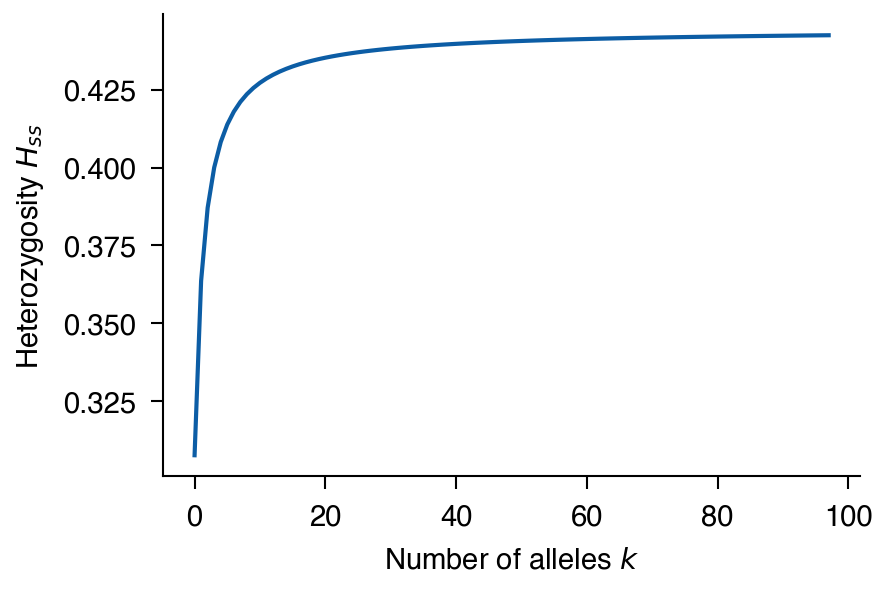

In [72]:
mu = 2e-8 # humans, per bp per generation, SNP
Ne = 1000 # humans, from past bottlenecks
L = 1e4
k = np.arange(2,100)
def Hss(mu,Ne,k):
    return (2*mu)/(1/(2*Ne)+(2*mu)*k/(k-1))
plt.plot(Hss(mu*L,Ne,k))
plt.xlabel(r"Number of alleles $k$")
plt.ylabel(r"Heterozygosity $H_{ss}$");

# Problem 2 Simulations of Genetic Drift (8 points)
> Start with a population of $N=100$ diploid individuals, each of which has two homologous chromosomes, giving you a total of $2N$ chromosomes to track. Each chromosome has a single polymorphic locus (SNP) that can be in one of two states. To code this, create an array of integers, of length $2N$, and set the value of each element to either 1 or 2 depending on the allele of this chromosome. In the initial population, alleles 1 and 2 are equally abundant, i.e. $p=q=0.5$. Please take a look at the included starter code if you need guidance (`pset1_sample_code.py`).


## Problem 2 a
> Simulate drift in one population. Generate the next generation by drawing individuals at random from the current generation with replacement. Compute heterozygosity for each generation. Continue until all individuals become of one type -- this is called fixation. Show a plot of heterozygosity $(p)$ over time for 1 trajectory.

In [9]:
def freq(alleles):
    n_alleles = len(alleles)
    p = sum(alleles == 1)/n_alleles
    return p

def heterozygosity(alleles):
    n_alleles = len(alleles)
    p = sum(alleles == 1)/n_alleles
    return 2*p*(1-p)

def drift(n_individuals,p0):
    p0 = 0.5
    n_chromosomes = 2*n_individuals
    alleles = np.random.choice([1,2],
                            size=n_chromosomes,
                            p=[p0,1-p0])
    p = freq(alleles)
    p_lst = [p]
    Ht_lst = [2*p*(1-p)]
    while p_lst[-1] != 0 and p_lst[-1] != 1:
        alleles = np.random.choice(alleles,
                        size=n_chromosomes)
        p = freq(alleles)
        p_lst.append(p)
        Ht_lst.append(2*p*(1-p))
    return p_lst, Ht_lst


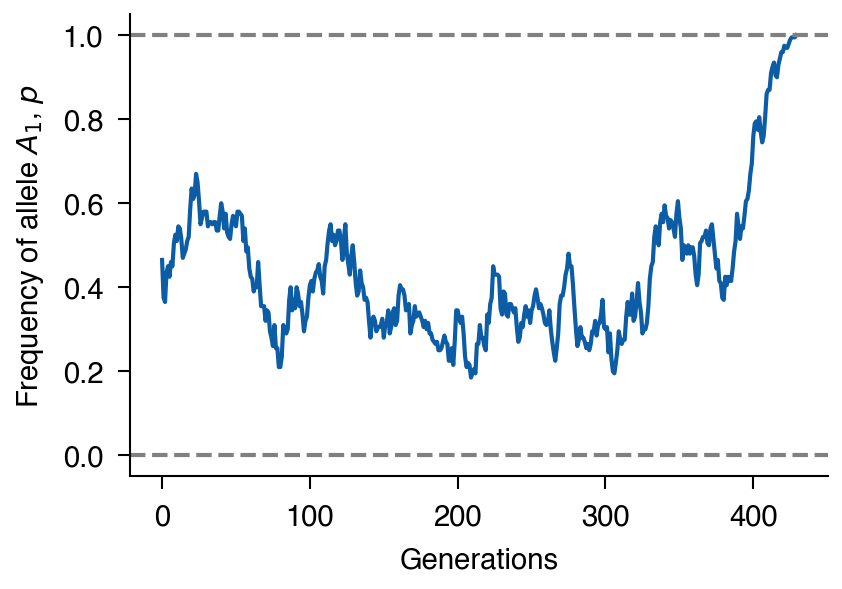

In [331]:
fig, ax = plt.subplots()
p_lst, _ = drift(100,0.5)
plt.plot(p_lst)
ax.set_ylabel("Frequency of allele $A_1$, $p$")
ax.set_xlabel("Generations")
ax.axhline(1,linestyle="--", color="gray")
ax.axhline(0, linestyle="--", color="gray");

## Problem 2 b
> Simulate 1000 trajectories, keeping a record of the fixation time for each simulation. Compute the mean time to fixation and compare it to $N$. You can run your simulations at 3-5 different values of $N$ to establish this dependence better.

$$H_{t}=H_0\left(1-\frac{1}{2N}\right)^{t}\approx H_0 \exp\left[{-\frac{t}{2N}}\right]$$

In [ ]:
t_dct = {}
Ns = [100,250,500,750,1000]
for N in Ns:
    t_fixation_or_loss = []
    for _ in range(1000):
        p_lst,_ = drift(N,0.5)
        t_fixation_or_loss.append(len(p_lst))
    arr = np.array(t_fixation_or_loss)
    np.savetxt(f"./20230916_time_to_fixation/{N}.txt",arr)

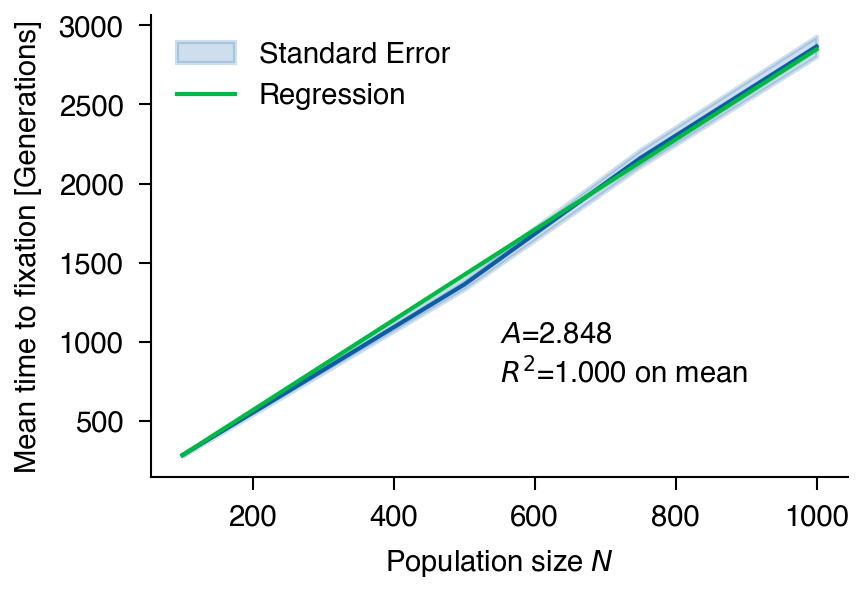

In [546]:
fig, ax = plt.subplots()
lst = []
Ns = [100,250,500,750,1000]
for N in Ns:
    arr =  np.loadtxt(f"./20230916_time_to_fixation/{N}.txt")
    df = pd.DataFrame(arr, columns=["TimeToFixation"])
    df["N"] = N
    lst.append(df)
fixation_time_df = pd.concat(lst)
sns.lineplot(fixation_time_df, x="N", y="TimeToFixation", errorbar="se")
ax.set_xlabel("Population size $N$")
ax.set_ylabel("Mean time to fixation [Generations]")

model = smf.ols("TimeToFixation ~ N-1",
                data = fixation_time_df.groupby("N").mean().reset_index())
results = model.fit()
fixation_time_df["Predict"] = results.predict(fixation_time_df["N"])
sns.lineplot(fixation_time_df, x="N", y="Predict")
ax.text(550,750,"$R^2$={:.3f} on mean".format(results.rsquared))
ax.text(550,1000,"$A$={:.3f}".format(results.params["N"]))
ax.legend(["_","Standard Error","Regression"]);


The mean time to fixation is proportional to the population size. This result aligns with our estimates from the characteristic time $\tau \sim 2N$ from the exponential decay of the heterozygosity.

## Problem 2 c
> Plot 10 individual trajectories of heterozygosity vs. time on a single graph. In addition, for each time point, compute the average heterozygosity by averaging over all 1000 trajectories and plot the average heterozygosity vs time. To better see the exponential decay of heterozygosity you can plot the log of heterozygosity vs time. Measure the rate of decay of heterozygosity (the slope on the log-linear plot). Compare it to N.

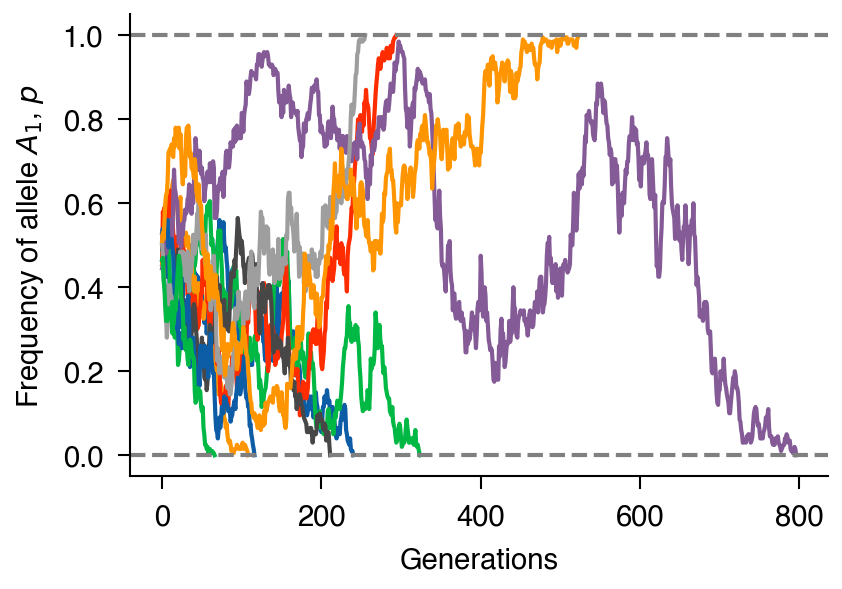

In [35]:
fig, ax = plt.subplots()
for _ in range(10):
    p_lst, _ = drift(100,0.5)
    ax.plot(p_lst)
ax.set_ylabel("Frequency of allele $A_1$, $p$")
ax.set_xlabel("Generations")
ax.axhline(1,linestyle="--", color="gray")
ax.axhline(0, linestyle="--", color="gray");

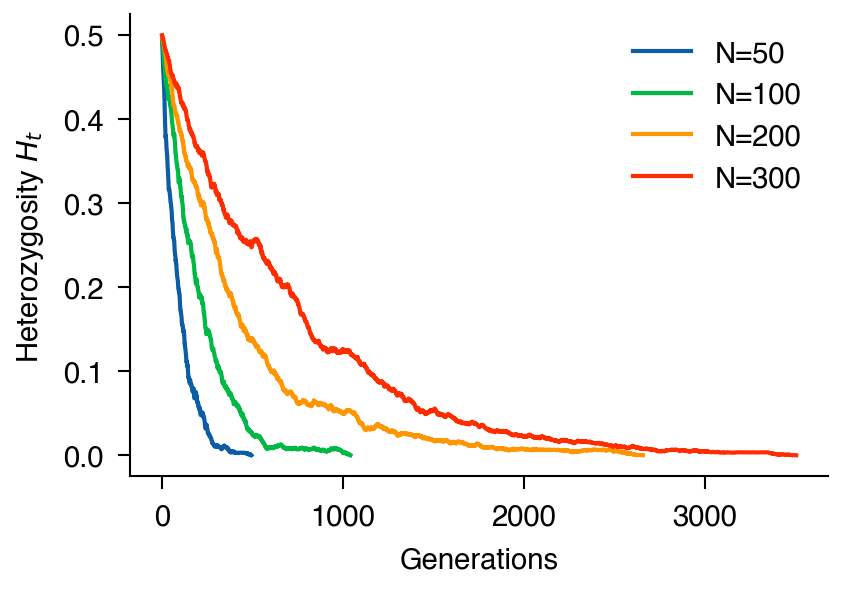

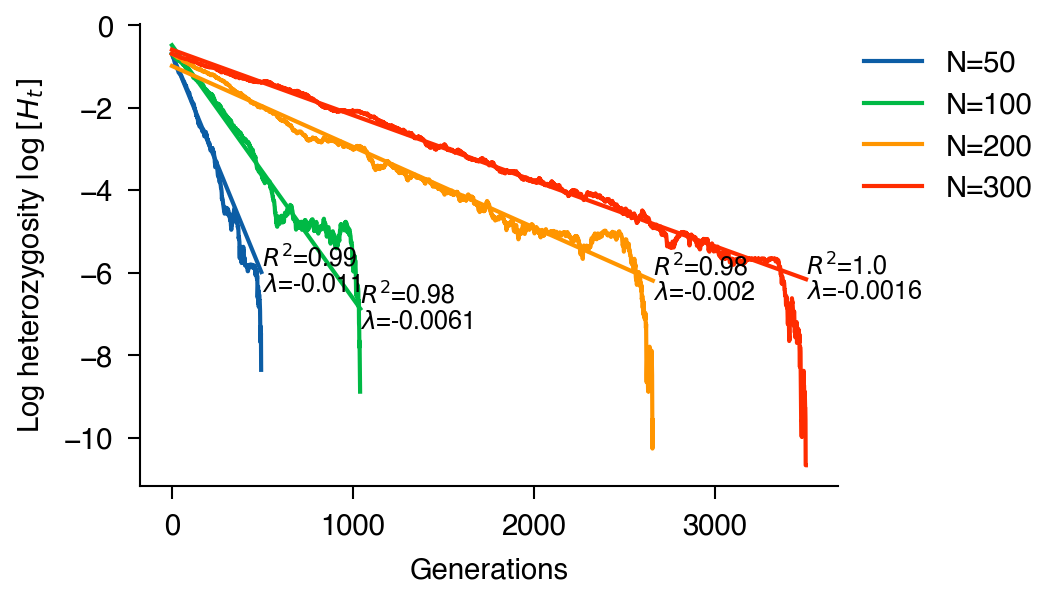

In [550]:
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()

for N in [50,100,200,300]:
    num_processes = cpu_count()-1
    with Pool(processes=num_processes) as pool:
        results = pool.map(lambda x: drift(N,0.5),range(1000))

    Ht_results = [i[1] for i in results]

    lens = np.array([len(i) for i in Ht_results])

    # Mask of valid places in each row
    mask = np.arange(lens.max()) < lens[:,None]

    out = np.zeros(mask.shape)
    out[mask] = np.concatenate(Ht_results)
    mean_heterozygosity = out.mean(axis=0)

    log_mean_heterozygosity = np.log(mean_heterozygosity)


    ax1.plot(mean_heterozygosity, label="N={:.0f}".format(N))
    ax1.set_ylabel("Heterozygosity $H_t$")
    ax1.set_xlabel("Generations");
    ax1.legend()

    color=next(ax2._get_lines.prop_cycler)['color']
    ax2.plot(log_mean_heterozygosity, color=color, label="N={:.0f}".format(N))
    ax2.set_ylabel(r"Log heterozygosity $\log\left[H_t\right]$")
    ax2.set_xlabel("Generations")
    ax2.legend(bbox_to_anchor=(1,1))


    df = pd.DataFrame()
    df["Log"] = log_mean_heterozygosity
    df["Generations"] = np.arange(1,len(mean_heterozygosity)+1)
    model = smf.ols("Log ~ Generations", data = df[:-250])
    results = model.fit()

    ax2.plot(results.predict(df["Generations"]), color=color)
    ax2.annotate("$R^2$={:.2}".format(results.rsquared),
                xy=(len(results.predict(df["Generations"])),
                    results.predict(df["Generations"]).iloc[-1]),
                # xycoords='axes fraction',
                horizontalalignment='left',
                verticalalignment='bottom',
                fontsize=6)
    ax2.annotate("$\lambda$={:.2}".format(results.params["Generations"]),
                xy=(len(results.predict(df["Generations"])),
                    results.predict(df["Generations"]).iloc[-1]),
                # xycoords='axes fraction',
                horizontalalignment='left',
                verticalalignment='top',
                fontsize=6)

The log heterozygosity is largely linear with negative gradient and implies an exponential decay of the heterozygosity. Let the rate of decay of heterozygosity be $\lambda$. For random mating, fixed population sizes, no mutation, no selection, we have:
$$H_{t}=H_0\left(1-\frac{1}{2N}\right)^{t}\approx H_0 \exp\left[{-\frac{t}{2N}}\right]$$

$$\log H_{t}=\log H_0 -\frac{1}{2N}t$$

$$\log H_{t}= \log H_0 +\lambda t$$

In [ ]:
lst = []
Ns = (np.logspace(np.log10(50),np.log10(500))).astype(int)
for N in Ns:
    num_processes = cpu_count()-1
    with Pool(processes=num_processes) as pool:
        results = pool.map(lambda x: drift(N,0.5),range(1000))

    Ht_results = [i[1] for i in results]

    lens = np.array([len(i) for i in Ht_results])

    # Mask of valid places in each row
    mask = np.arange(lens.max()) < lens[:,None]

    out = np.zeros(mask.shape)
    out[mask] = np.concatenate(Ht_results)
    mean_heterozygosity = out.mean(axis=0)

    log_mean_heterozygosity = np.log(mean_heterozygosity)
    df = pd.DataFrame()
    df["Log"] = log_mean_heterozygosity
    df["Generations"] = np.arange(1,len(mean_heterozygosity)+1)
    model = smf.ols("Log ~ Generations", data = df[:-250])
    results = model.fit()
    lst.append((N,results.params["Generations"]))

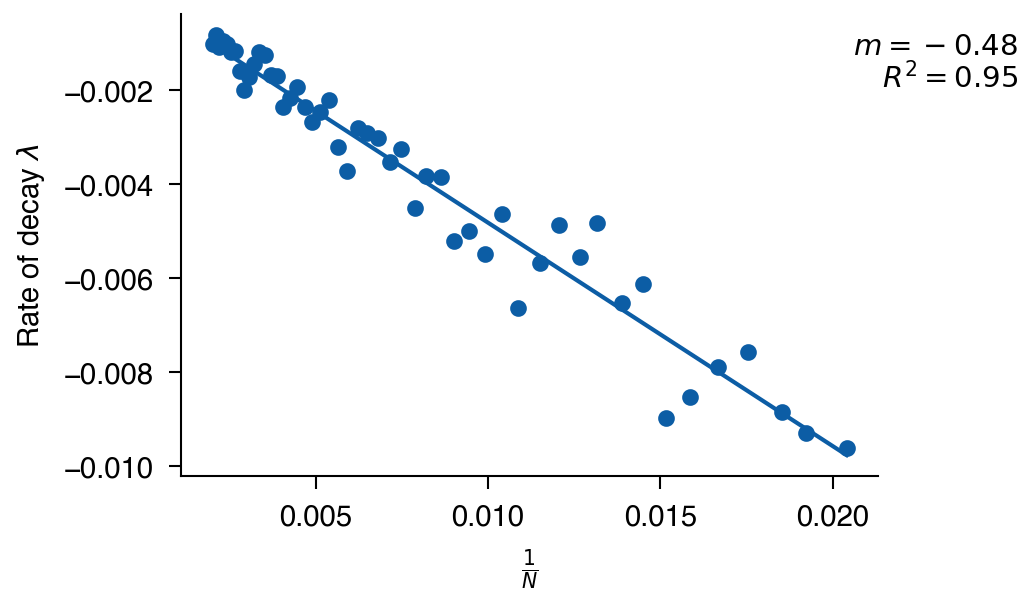

In [506]:
rates = pd.DataFrame(lst,columns=["N", "Lambda"])
rates["ReciprocalN"] = 1/rates["N"]
fig,ax = plt.subplots()
ax.scatter(rates["ReciprocalN"],rates["Lambda"])
ax.set_xlabel(r"$\frac{1}{N}$")
ax.set_ylabel(r"Rate of decay $\lambda$")
model = smf.ols("Lambda ~ ReciprocalN", data = rates)
results = model.fit()
ax.annotate("$m={:.2f}$".format(results.params["ReciprocalN"]),
            xy=(1.2,0.9),
            xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
ax.annotate("$R^2={:.2f}$".format(results.rsquared),
            xy=(1.2,0.9),
            xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='top')
ax.plot(rates["ReciprocalN"],results.predict(rates["ReciprocalN"]))

Plotting $\lambda$ against $\frac{1}{N}$, we observe the gradient of $-\frac{1}{2}$:
$$\lambda = -\frac{1}{2}\frac{1}{N}$$

Practically speaking, we can estimate the population size from the rate of decay of heterozygosity $\lambda$:
$$\lambda=-\frac{1}{2}\frac{1}{N} \implies N = -\frac{1}{2\lambda}$$

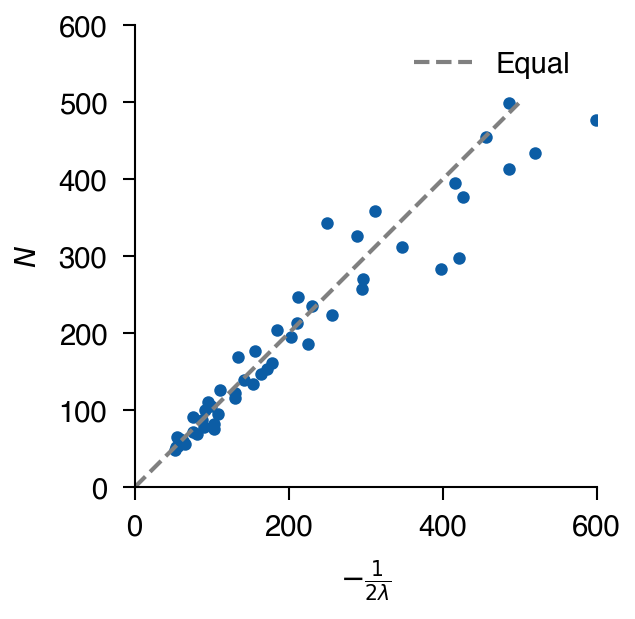

In [538]:
rates["ReciprocalLambda"] = 1/rates["Lambda"]
fig,ax = plt.subplots()
sns.scatterplot(x=-0.5*rates["ReciprocalLambda"],
                y=rates["N"],
                linewidth=0)
ax.plot(np.arange(0,500),
        np.arange(0,500),
        color="grey",
        linestyle="--",
        label="Equal")
ax.set_aspect('equal', adjustable='box')
ax.set_xlim([0,600])
ax.set_ylim([0,600])
ax.set_ylabel("$N$")
ax.set_xlabel(r"$-\frac{1}{2\lambda}$")
ax.legend();

## Problem 2 d
> Consider an effect of changing population size on the time to fixation. Run simulations first at some $N=N_1$ and then change $N$ to $N=N_2$ for $t_2$ number of generations then back to $N_1$. Try $N_2\ll N_1$, e.g. $N_2=N_1/10$. Make 1000 runs and compute the mean time to fixation. Try several $N_1$ and $N_2$. How does decrease in the population size change the mean time to fixation? Compute $N_\mathrm{eff}$ for each parameters ($N_1$, $N_2$, $t_2$), and correlated mean time to fixation with $N_1$, $N_2$, and $N_\mathrm{eff}$. Interpret your findings.


In [559]:
def driftVaryingPopulation(N0,p0,ratio,onset,t_2):
    n_chromosomes = 2*N0
    alleles = np.random.choice([1,2],
                            size=n_chromosomes,
                            p=[p0,1-p0])
    p_lst = [freq(alleles)]
    Ht_lst = [heterozygosity(alleles)]
    N_lst = [n_chromosomes/2]
    generation = 1
    while p_lst[-1] != 0 and p_lst[-1] != 1:
        generation += 1
        if generation <= onset or generation > onset+t_2:
            alleles = np.random.choice(alleles,
                            size=n_chromosomes)
            N_lst.append(n_chromosomes/2)
        else:
            alleles = np.random.choice(alleles,
                            size=round(n_chromosomes/ratio))
            N_lst.append(n_chromosomes/2/ratio)
        p_lst.append(freq(alleles))
        Ht_lst.append(heterozygosity(alleles))
    return p_lst, Ht_lst, N_lst

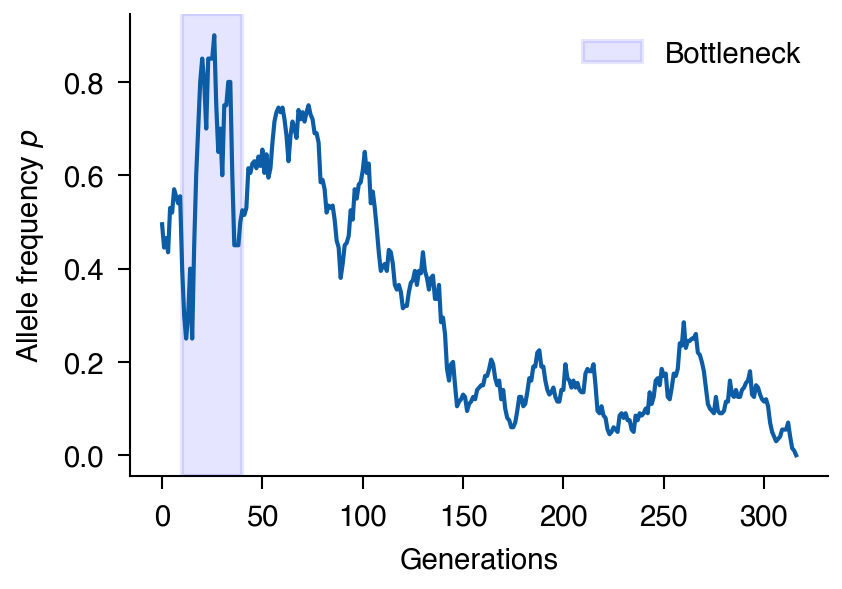

In [402]:
fig, ax = plt.subplots()
N = 100
ratio = 10
onset = 10
t2 = 30
p_lst, _, _ = driftVaryingPopulation(N,0.5,ratio,onset,t2)
plt.plot(p_lst)
ax.axvspan(onset,onset+t2, alpha=0.1, color='blue', label="Bottleneck")
ax.set_ylabel("Allele frequency $p$")
ax.set_xlabel("Generations")
ax.legend();

In [6]:
def run_parallel_workers(N1,ratio,t2):
    num_processes = cpu_count()-1
    with Pool(processes=num_processes) as pool:
        results = pool.map(lambda x: driftVaryingPopulation(N1,0.5,ratio,10,t2),
                           range(1000))
    return results

In [27]:
for N1 in [100,250,500,750,1000]:
    for ratio in [1,2,5,10,20]:
        for t2 in [10,50,100,150,200,250]:
            name = os.path.join(projectdir,
                    "20230916_time_to_fixation",
                    f"bottleneck_{N1}_{ratio}_{t2}.txt")
            if os.path.isfile(name):
                continue
            lst = []
            results = run_parallel_workers(N1,ratio,t2)
            for loop in results:
                p_lst, _, N_lst = loop
                N_e = scipy.stats.hmean(N_lst)
                lst.append((len(p_lst),N_e))
            np.savetxt(name,np.array(lst))

In [171]:
lst = []
for N1 in [100,250,500,750,1000]:
    for ratio in [1,2,5,10,20]:
        for t2 in [10,50,100,150,200,250]:
            name = os.path.join(".",
                    "20230916_time_to_fixation",
                    f"bottleneck_{N1}_{ratio}_{t2}.txt")
            arr = np.loadtxt(name)
            mean = np.mean(arr,axis=0)
            lst.append((N1,ratio,t2,mean[0],mean[1]))
bottleneck_df = pd.DataFrame(lst,
                             columns=["N1","Ratio","t2","TimeToFixation","Ne"])
bottleneck_df["N2"] = bottleneck_df["N1"]/bottleneck_df["Ratio"]

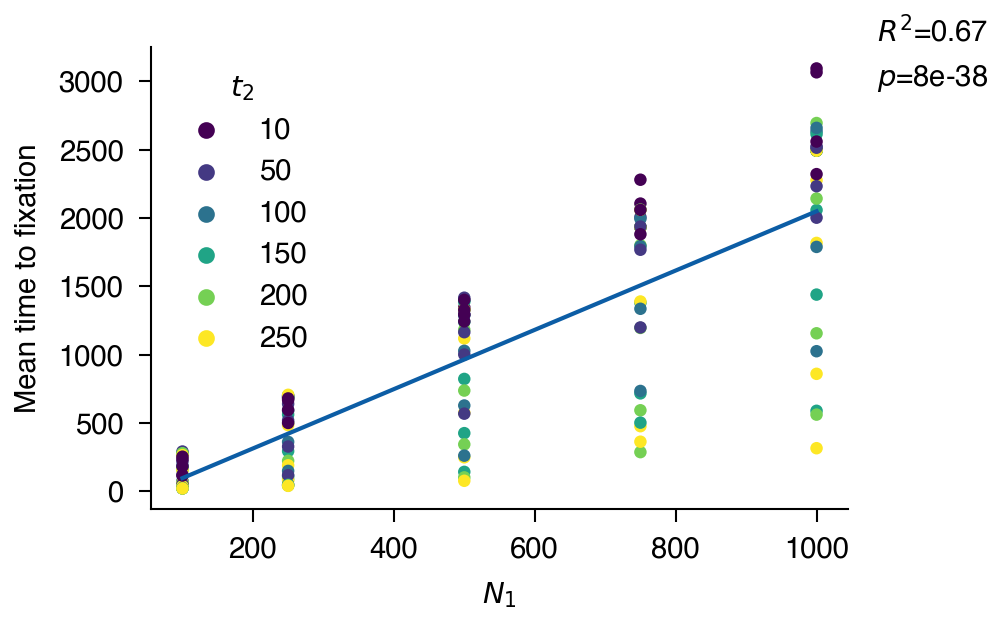

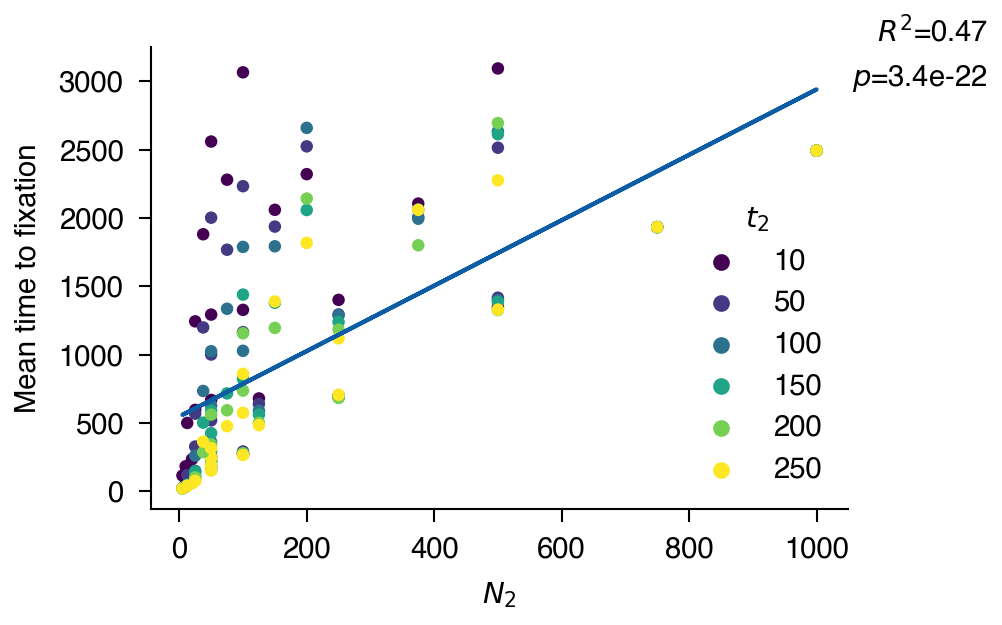

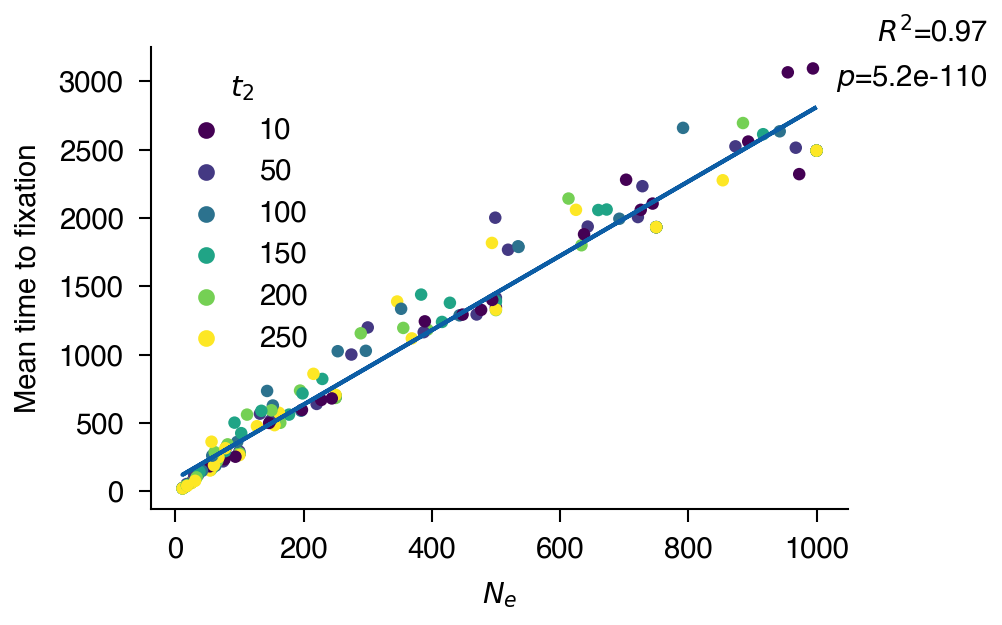

In [172]:
def fixation_plot(N,name):
    fig,ax = plt.subplots()
    sns.scatterplot(bottleneck_df,
                    x=N,
                    y="TimeToFixation",
                    hue="t2",
                    palette="viridis",
                    edgecolor="None")
    model = smf.ols(f"TimeToFixation ~ {N}", data = bottleneck_df)
    results = model.fit()
    ax.plot(bottleneck_df[N],results.predict(bottleneck_df[N]))
    ax.annotate("$R^2$={:.2}".format(results.rsquared),
                xy=(1.2,1),
                xycoords='axes fraction',
                horizontalalignment='right',
                verticalalignment='bottom')
    ax.annotate("$p$={:.2}".format(results.pvalues[-1]),
                xy=(1.2,0.9),
                xycoords='axes fraction',
                horizontalalignment='right',
                verticalalignment='bottom')
    ax.set_ylabel("Mean time to fixation")
    ax.set_xlabel(name);
    ax.legend(title="$t_2$")
    return fig, ax

fixation_plot("N1","$N_1$")
fixation_plot("N2","$N_2$")
fixation_plot("Ne","$N_e$");


The mean time to fixation is correlated with all three of $N_1$, $N_2$, and $N_e$, but $N_e$ is the best linear predictor of the mean time to fixation. $N_e$ best explains the variation in mean time to fixation because it incorporates the number of generations experiencing the bottleneck, $t_2$, through the harmonic mean.

The decreases in the population size decreases the mean time to fixation by increasing the variance of the steps and increasing the probability to fixation or loss. The longer the decrease (the greater the $t_2$) the lower the mean time to fixation for a given $N_2$.


## Problem 2 e
> [Extra credit: +2 points] Plot the distribution of the fixation time for each $N$. How broad is the distribution? Think of various ways to quantify this. Study the mean time to fixation as a function of the number K of alleles (types of individuals), starting with $1/K$ initial frequency.

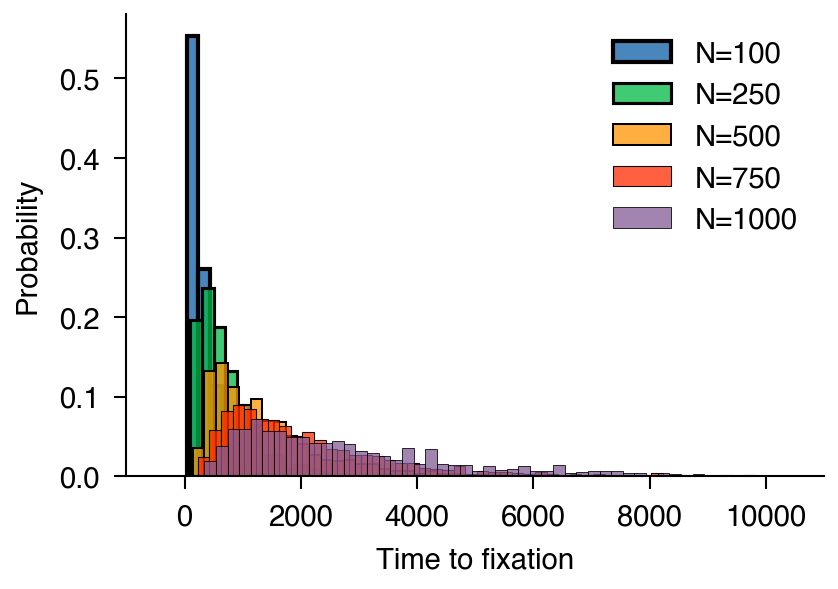

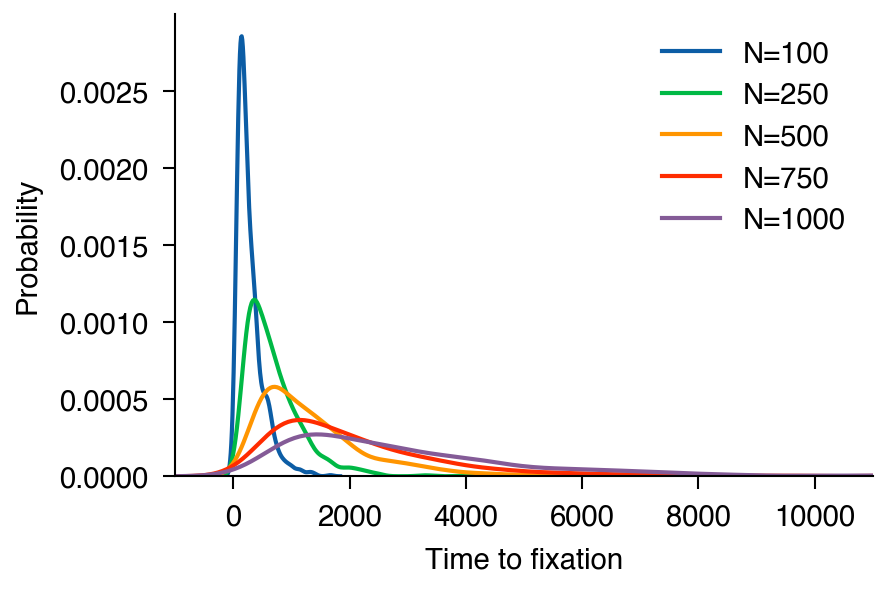

In [34]:
Ns = [100,250,500,750,1000]
fig, ax = plt.subplots()
for N in Ns:
    arr = np.loadtxt(f"./20230916_time_to_fixation/{N}.txt")
    ax = sns.histplot(arr, binwidth = 200, stat="probability", label = f"N={N}")
ax.legend()
plt.ylabel("Probability")
plt.xlabel("Time to fixation")
plt.xlim([-1000, 11000])

fig, ax = plt.subplots()
for N in Ns:
    arr = np.loadtxt(f"./20230916_time_to_fixation/{N}.txt")
    sns.kdeplot(arr, label = f"N={N}")
ax.legend()
plt.ylabel("Probability")
plt.xlabel("Time to fixation")
plt.xlim([-1000, 11000]);

The mean and variance of the distribution increases with $N$. We can quantify the broadness through the coefficient of variance.

In [901]:
for N in reversed(Ns):
    arr = np.loadtxt(f"./20230916_time_to_fixation/{N}")
    print("N = {}, ".format(N), "CV = {}".format(np.std(arr)/np.mean(arr)))

N = 1000,  CV = 0.7536712324154138
N = 500,  CV = 0.7510492725102286
N = 100,  CV = 0.7179094134418806


For a given population size $N$, the mean time to fixation or loss decreases as the number $K$ alleles increases. Here, we implement a new drift function with $k$ alleles.

In [ ]:
def drift_k(n_individuals,k):
    n_chromosomes = 2*n_individuals
    alleles = np.random.choice(range(k),
                            size=n_chromosomes,
                            p=[1/k]*k)
    p = sum([i==0 for i in alleles])/len(alleles)

    p_lst = [p]
    Ht_lst = [2*p*(1-p)]
    while p_lst[-1] != 0 and p_lst[-1] != 1:
        alleles = np.random.choice(alleles,
                        size=n_chromosomes)
        p = freq(alleles)
        p_lst.append(p)
        Ht_lst.append(2*p*(1-p))
    return p_lst, Ht_lst

Text(0, 0.5, 'Mean time to fixation')

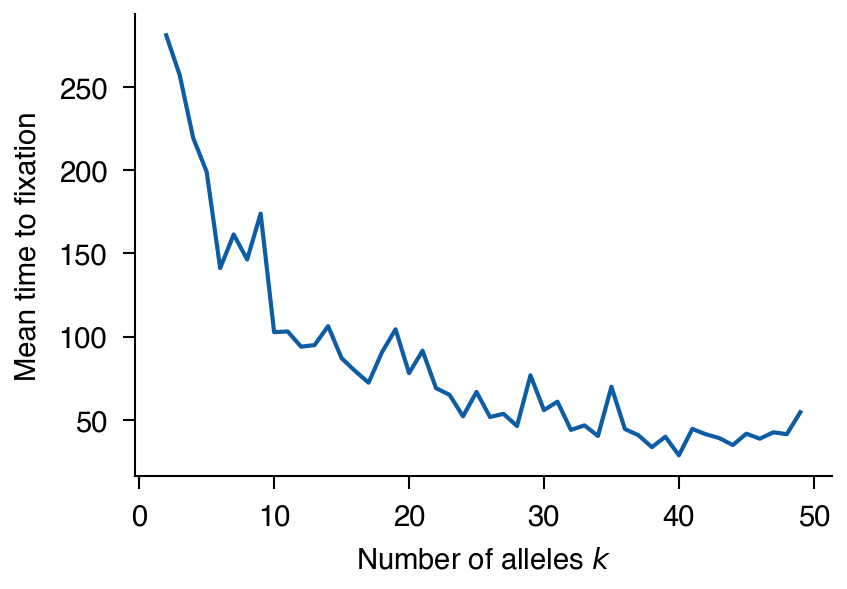

In [42]:
t_arr = []

for k in np.arange(2,50):
    num_processes = cpu_count()-1
    with Pool(processes=num_processes) as pool:
        results = pool.map(lambda x: drift_k(100, k),range(1000))

    t_mean= np.mean([len(i) for i,j in results])
    t_arr.append((k,t_mean))
t_arr = np.array(t_arr)
plt.plot(t_arr[:,0],t_arr[:,1])
plt.xlabel("Number of alleles $k$")
plt.ylabel("Mean time to fixation")

# Problem 3 Parameters and population genetics (3 points)
> A researcher is trying to understand the genetic mutations that lead to resistance to a new antibiotic they have discovered, called techacillin. To do this, they decide to grow many replicate populations of E. coli in a morbidostat (an experimental device that keeps a constant population size and growth rate, while increasing antibiotic concentration as bacteria become more resistant) until they have reached a high level of techacillin resistance. They will then sequence the final and intermediate mutants and identify the mutations that emerged and their order.

## Problem 3 a
> The researcher wants to observe the full diversity of possible resistance mutations, including those with relatively minor, but significant, effects on resistance (>10% increase in growth rate in presence of low levels of drug). To do so, they will need to minimize clonal interference between mutants. They estimate that during every replication, $10^{-5}$ new mutations emerge that provide significant resistance (as by the aforementioned criteria). What is the maximum population size they can use without interference occurring?

We can estimate the maximum population size directly based on the rate of emergence of beneficial mutations. The rate of beneficial mutations that provide resistance emerging is:
$$\mu_{\mathrm{b}}=10^{-5} \text{ per generation per locus}$$
The rate of acquiring new beneficial mutations per generation is:
$$n_{\mathrm{b}} = N\mu_{\mathrm{b}}$$
Clonal interference occurs when more than one beneficial mutation occurs per generation:
$$n_{\mathrm{b}} = N\mu_{\mathrm{b}}>1$$
The maximum population size to avoid clonal interference is:
$$
\begin{aligned}
N\mu_{\mathrm{res}}&=1\\
N&=\frac{1}{\mu_{\mathrm{res}}}\\
N&=10^5
\end{aligned}
$$


Another way of estimating the maximum population size is to compare the time to fixation and loss. The time to fixation for strongly beneficial mutations in a haploid is:
$$T_{\text{fixation}}=\frac{\ln N }{s}$$
The probability for a mutation to emerge and fix is:
$$P_\text{occur}=2N\mu_\mathrm{b} s$$
The time for a mutation to emerge and fix:
$$T_{\text{occur}}=\frac{1}{2N\mu_\mathrm{b}s}$$

To avoid clonal interference, we want beneficial mutations to arise (occur) and then have enough time to become fixed before another beneficial mutation emerges.

Clonal interference occurs when a beneficial mutation that emerges does not have enough time to become fixed before another one emerges, that is, the time to occurence is less than the time to fixation:

$$T_{\text{occur}}<T_{\text{fixation}}$$

We want to operate in the regime of no clonal interference, where new beneficial mutations fix fast enough before another emerges:

$$
\begin{aligned}
T_{\text{occur}}&>T_{\text{fixation}}\\
T_{\text{occur}}-T_{\text{fixation}}&>0\\
\frac{1}{2N \mu_\mathrm{b}s}- \frac{ \ln N}{s}&>0\\
\frac{1}{s}\left(\frac{1}{2N \mu_\mathrm{b}}- \ln N\right)&>0\\
\frac{1}{2N \mu_\mathrm{b}}- \ln N&>0\\
N&>5773\\
\end{aligned}
$$

5773.037773037773


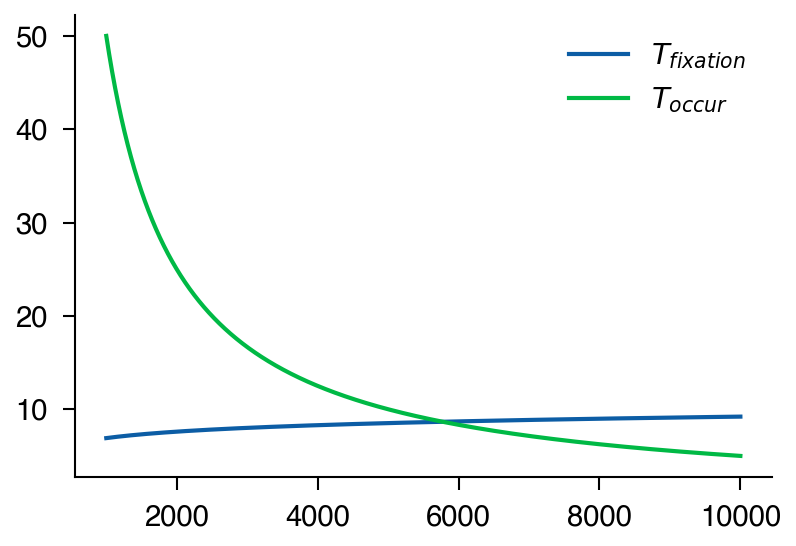

In [552]:
Toccur = lambda N, mu: 1/(2*N*mu)
Tfix = lambda N: np.log(N)
mu = 1e-5

Ns = np.linspace(1e3,1e4,round(1e6))
Nlim = Ns[np.nanargmin((Tfix(Ns)-Toccur(Ns, mu))**2)]
print(Nlim)
plt.plot(Ns, Tfix(Ns), label = "$T_{fixation}$")
plt.plot(Ns, Toccur(Ns, mu), label = "$T_{occur}$")
plt.legend();

This corresponds to $N<5773$. This is a more conservative estimate of the maximum population size than $N<10000$.

## Problem 3 b
> Why would the researcher want to use the highest possible population size within this regime?

The rate of acquiring new beneficial mutations per generation is:
$$n_{\mathrm{b}} = N\mu_{\mathrm{res}}$$

Increasing the population size results in a greater flux of new mutations per generation into the population. To maximise the probability of appearance of new mutations, the researcher should maximise population size at the limit of the regime of no clonal interference ($N<10^5$).

## Problem 3 c
> How will the types of observed mutations (in terms of fitness effect) change if they use a higher population size?

Using a higher population size ($N> 10000$ or $N> 5773$), clonal interference will occur. In this regime, only the mutation with the highest fitness will win and be observed. The diversity of mutations decreases because only one type of mutation is observed, at least before a mutation with even higher fitness appears.

# Problem 4 Effective population size. (3 points)
> Derive a formula for the effective population size, $N_e$, if the number of males ($N_m$) and number of females ($N_f$) are not equal. (Hint: use the same method we used to derive $N_e$ for the case of a population that is fluctuating in size.)
>
>To fix a concrete case, consider the following example. Imagine a zoo population of primates with 20 males and 20 females. Due to the dominance hierarchy, only one of the males actually breeds. What is the relevant population size that informs us about the strength of drift in this system? Is it 40? 21? To get the answer, compute the probability that two genes drawn at random are alike (identical by descent) in this new situation, depending on random draws of genes from both the males (actually just one male) and 20 females

There are four permutations of taking alleles from the male and female pool. Assume a large population size, such that the distribution of alleles in male and female populations are the same (homogeneous). 

The probability of selecting the same kind of allele from the same sex pool ($P_{MM}$ or $P_{FF}$) should have the same expression as the single population case, just with $N_m$ or $N_f$.

The probability of selecting the same kind of allele from the opposite sex pool is simply the homozygosity.

![](pset_1_assets/TwoGender.png){width=300}

Assume hermaphrodite diploid individuals, random mating, no selection, and no migration. 

$$
\begin{aligned}
G_{t+1}&=P_{MM}+P_{MF}+P_{FM}+P_{FF}\\
& = \frac{1}{4}\left[\frac{1}{2N_m}+ \left(1-\frac{1}{2N_m}\right)G_t\right]\\&
+\frac{1}{4}(1)G_t\\&
+\frac{1}{4}(1)G_t\\
&+\frac{1}{4}\left[\frac{1}{2N_f}+ \left(1-\frac{1}{2N_f}\right)G_t\right]\\
G_{t+1}&=\frac{1}{4}\left(\frac{1}{2N_m}+\frac{1}{2N_f}\right)+\frac{1}{4}\left(4-\frac{1}{2N_m}-\frac{1}{2N_f}\right)G_t\\
G_{t+1}&=\frac{2N_m+2N_f}{16N_mN_f}+\left(1-\frac{2N_m+2N_f}{16N_mN_f}\right)G_t\\
1-H_{t+1}&=\frac{2N_m+2N_f}{16N_mN_f}+\left(1-\frac{2N_m+2N_f}{16N_mN_f}\right)(1-H_t)\\
1-H_{t+1}&=\frac{2N_m+2N_f}{16N_mN_f}+1-H_t-\frac{2N_m+2N_f}{16N_mN_f}+\frac{2N_m+2N_f}{16N_mN_f}H_t\\
-H_{t+1}&=-H_t+\frac{2N_m+2N_f}{16N_mN_f}H_t\\
H_{t+1}&=H_t\left(1-\frac{2N_m+2N_f}{16N_mN_f}\right)\\
\end{aligned}
$$

Using the effective population size $N_e$ as an approximation:
$$
\begin{aligned}
H_{t+1}&\approx H_t\left(1-\frac{1}{2N_{e}}\right)\\
2N_e&=\frac{16N_mN_f}{2N_m+2N_f}\\
N_e &= \frac{8N_mN_f}{2N_m+2N_f}\\
N_e &= \frac{4N_mN_f}{N_m+N_f}\\
\end{aligned}
$$

For $N_m=1$ and $N_f=20$,
$$N_e = \frac{4 N_m N_f}{N_m + N_f}=\frac{4(1)(20)}{1+20}=3.81$$

# Problem 5 Extra Credit: Mean time to either fixation or loss (10 points)
> The mean time of either fixation or loss $t (p)$ can be derived similar to the way probability of fixation was derived in the class. Consider a two-allele model, an allele with initial frequency p in a population of $N$ diploids without selection or mutations. Derive a recursive relationship for the mean time to fixation-or-loss, which only slightly differs from the recursive relationship from the probability of fixation

The probability of fixation is the mean probability over all possible branches in the next time step.

$$\Pi(p)=\sum_{\Delta p} \Pi(p+\Delta p)\mathrm{Prob}(\Delta p)$$

Likewise, the time to fixation is the mean time over all branches in the next step, but we need to account for stepping into the future by adding 1.
$$t(p)=1+\sum_{\Delta p} t(p+\Delta p)\mathrm{Prob}(\Delta p)$$

## Problem 5 (a) 
> To obtain ODE for $t(p)$ do Taylor expansion while keeping only two leading terms.

$$t(p+\Delta p)= t(p) + t^\prime(p)\Delta p +  \frac{1}{2}t^{\prime \prime}(p)\Delta p^2+\cdots$$

Ignoring all terms higher than $\Delta p^2$:

$$
\begin{aligned}
t(p)&=1+\sum_{\Delta p} t(p+\Delta p)\mathrm{Prob}(\Delta p)\\
&\approx 1+\sum_{\Delta p} \left[t(p) + t^\prime(p)\Delta p +  \frac{1}{2}t^{\prime \prime}(p)\Delta p^2\right]\mathrm{Prob}(\Delta p)\\
&=1+t(p)\sum_{\Delta p}\mathrm{Prob}(\Delta p)+t^\prime(p)\sum_{\Delta p}\Delta p\mathrm{Prob}(\Delta p)+ \frac{1}{2}t^{\prime \prime}(p)\sum_{\Delta p}\Delta p^2\mathrm{Prob}(\Delta p)\\
t(p)&=1+t(p)+t^\prime(p)\left<\Delta p\right>+ \frac{1}{2}t^{\prime \prime}(p)\left<\Delta p ^ 2\right>\\
0&=1+t^\prime(p)\left<\Delta p\right>+ \frac{1}{2}t^{\prime \prime}(p)\left<\Delta p ^ 2\right>
\end{aligned}
$$

For no selection or mutation,

$$\left<\Delta p\right>=0$$
$$\left<\Delta p ^ 2\right>=\frac{p(1-p)}{2N}$$

$$
\begin{aligned}
0&=1+ \frac{1}{2}t^{\prime \prime}(p)\frac{p(1-p)}{2N}\\
\end{aligned}
$$

## Problem 5 (b)
> Write down boundary conditions for $t(p)$ and solve the equation.

$$t(0) = 0 $$
$$t(1) = 0 $$

$$
\begin{aligned}
0&=1+ \frac{1}{2}t^{\prime \prime}(p)\frac{p(1-p)}{2N}\\
-1&= t^{\prime \prime}(p)\frac{p(1-p)}{4N}\\
t^{\prime \prime}(p)&=-\frac{4N}{p(1-p)}\\
t^{\prime \prime}(p)&=-4N\left[\frac{1}{p}+\frac{1}{1-p}\right]\\
t^{\prime}(p)&=-4N\left[\ln{p}-\ln{(1-p)}\right]+A\\
t(p)&=-4N\left[(p\ln{p}-p)-\{-(1-p)\ln{(1-p)-p\}}\right]+Ap+B\\
t(p)&=-4N\left[p\ln{p}+(1-p)\ln{(1-p)}\right]+Ap+B\\
\end{aligned}
$$

$$t(0)=-4N(0)+0+B$$
Hence, $B=0$
$$t(1)=-4N(0)+A+B$$
Hence, $A=0$
The solution is:
$$t(p)=-4N\left[p\ln{p}+(1-p)\ln{(1-p)}\right]$$

## Problem 5 (c)
> Discuss genetic implications of your result. Consider $t(p)$ for a new mutation. For how long does a polymorphism live a population? Discuss the role of the population size, effect of bottlenecks. Make numeric estimates.

In [4]:
def meanFixationTime(p,N):
    return -4*N*(p*np.log(p)+(1-p)*np.log(1-p))

The mean time to fixation shows a linear dependency on $N$, and a "parabolic" dependency on the allele frequency $p$.

$$t(p)=-4N\left[p\ln{p}+(1-p)\ln{(1-p)}\right]$$

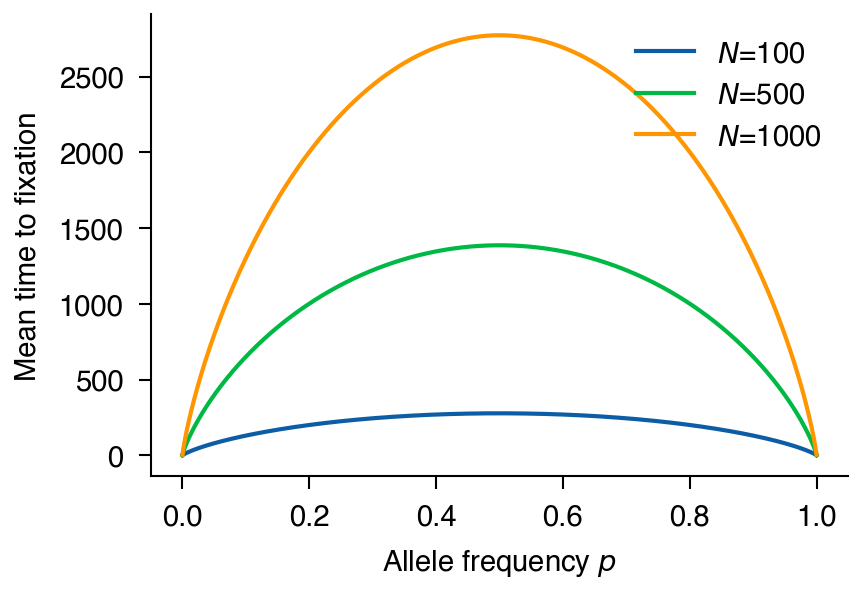

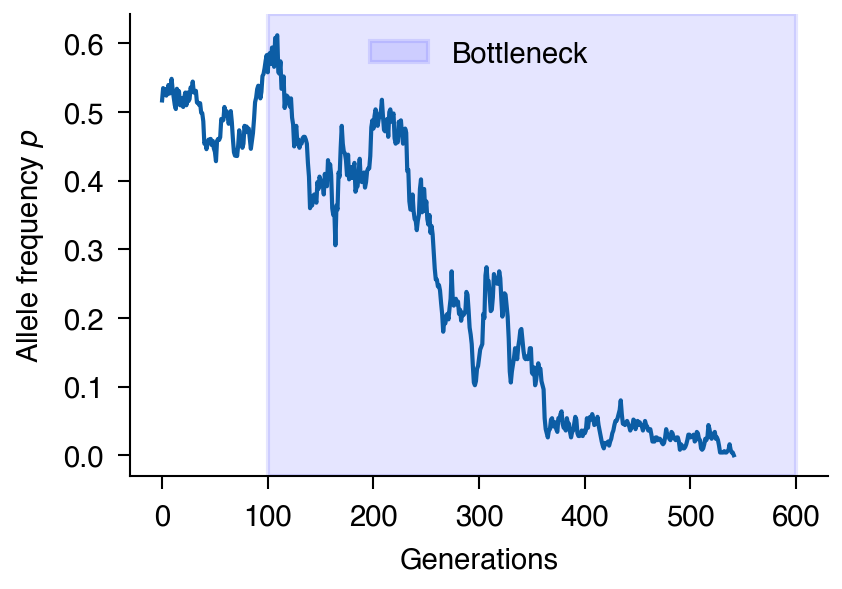

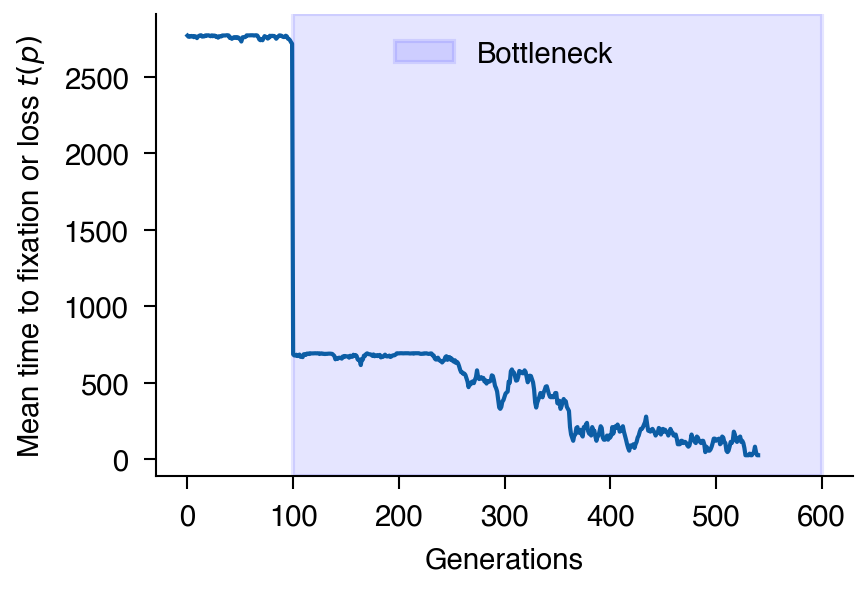

In [606]:
fig, ax = plt.subplots()
p_arr = np.linspace(0,1,10000)
for N in [100,500,1000]:
    plt.plot(p_arr,meanFixationTime(p_arr,N), label=f"$N$={N}")
plt.legend()
plt.ylabel("Mean time to fixation")
plt.xlabel("Allele frequency $p$")

fig, ax = plt.subplots()
onset = 100
t2 = 500
p_lst, Ht_lst, N_lst = driftVaryingPopulation(1000,0.5,4,onset,t2)
plt.plot(p_lst)
ax.axvspan(onset,onset+t2, alpha=0.1, color='blue', label="Bottleneck")
ax.set_ylabel("Allele frequency $p$")
ax.set_xlabel("Generations")
ax.legend()

fig, ax = plt.subplots()
meanFixationTArr = [meanFixationTime(p,N) for p,N in zip(p_lst,N_lst)]
plt.plot(meanFixationTArr)
ax.axvspan(onset,onset+t2, alpha=0.1, color='blue', label="Bottleneck")
ax.set_ylabel("Mean time to fixation or loss $t(p)$")
ax.set_xlabel("Generations")
ax.legend();

The mean time to fixation $t(p)$ is directly proportional to the population size $N$. Hence, bottlenecks decrease the mean time to fixation and speeds up fixation or loss (increases probability of fixation or loss).

For a new mutation, 
$$p=\frac{1}{2N}$$

For large population sizes,
$$p \ll 1$$
$$1-p \approx 1$$

$$\begin{aligned}
t(p)&=-4N\left[\frac{1}{2N}\ln{\frac{1}{2N}}+(1)\ln{1}\right]\\
&=-2\ln \frac{1}{2N}\\
t(p)&=2\ln 2 N 
\end{aligned}$$

The mean time to fixation or loss $t(p)$ has a logarithmic dependency on $N$. Note that the probability of fixation is $p=1/2N$ itself, so new mutations are significantly more likely to experience loss for large $N$.

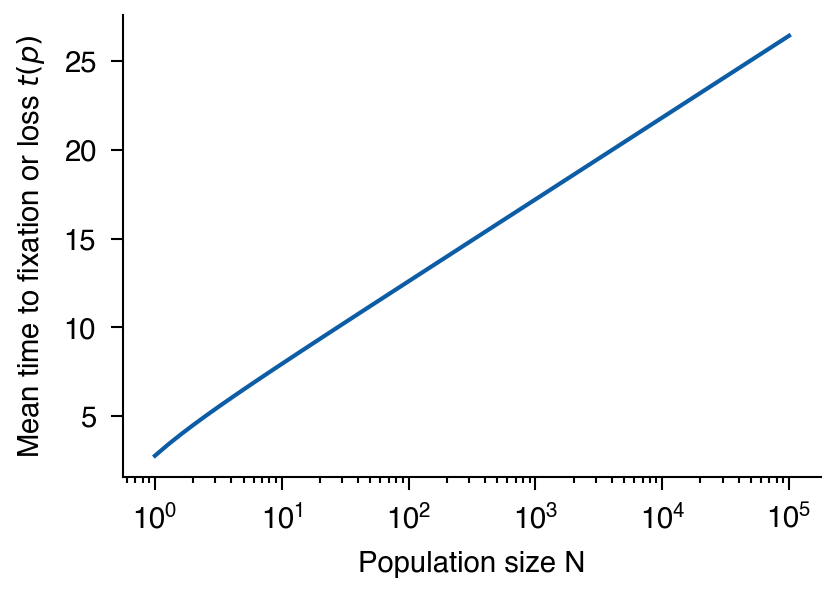

In [5]:
lst = []
arr = np.logspace(np.log10(1),np.log10(1e5))
for N in arr:
    lst.append(meanFixationTime(1/(2*N),N))
plt.semilogx(arr,lst)
plt.ylabel("Mean time to fixation or loss $t(p)$")
plt.xlabel("Population size N");